# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The standard deviation seems quite large is it compares to the mean. It makes me feel like there might be more insightful statistics to help understand and describe the data.

In [4]:
medical_charges = medical.charges

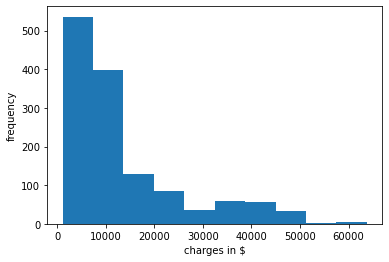

In [5]:
_ = plt.hist(medical_charges)
_ = plt.xlabel('charges in $')
_ = plt.ylabel('frequency')

In [6]:
sample_mean_med_charges = round(np.mean(medical_charges),2)
sample_std_med_charges = round(np.std(medical_charges, ddof=1),2)
print("Sample medical charges mean: ", sample_mean_med_charges, "Sample medical charges standard deviation: ", sample_std_med_charges)

Sample medical charges mean:  13270.42 Sample medical charges standard deviation:  12110.01


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since the mean is above $12,000, there's a good chance that the administrator's concern is unfounded. It seems as though the best frequentist test in this case would be the t-statistic since the data isn't normally distributed and we don't have the population standard deviation. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since the administrator is concerned primarily about average charges not falling below 12,000, it seems a one-sided confidence interval would be best. Based on the t-statistic calculations, average charges are greater than 13,270.42 with 95% certainty in the population. That seems reassuring knowing that the administrator is concerned about charges being above 12,000 which is below that range.

In [7]:
#Computing the t-value with 95% one-sided confidence interval and n=1338

t_value = t.ppf(.95, df=1337)

In [8]:
#Computing the standard error and margin of error

standard_error = sample_std_med_charges / (1338 ** 0.05)
margin_of_error = standard_error * t_value

In [9]:
#Calculating one-sided confidence interval

confidence_interval_upper_limit = round((sample_mean_med_charges + margin_of_error),2)
print("Upper Limit Confidence Interval: ", sample_mean_med_charges,", ",confidence_interval_upper_limit)

Upper Limit Confidence Interval:  13270.42 ,  27177.95


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ We are assuming that the variances of each group are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Null Hypothesis: There is no difference in the charges between uninsured and insured people. The means for insured and uninsured are equal.

Alternative Hypothesis: Insured people are charged more than uninsured. The mean for insured is greater than the mean for uninsured.

Since the p-value = 0.0 which is < .05, it appears that the sample means for insured and uninsured are valid indicating that insured people are charged more than uninsured.

In [10]:
#Divide data into two groups -- insured and uninsured.
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']
medical.shape, insured.shape, uninsured.shape
#Sum of insured and uninsured add up to all records in medical. (783 + 555 = 1338)

((1338, 8), (783,), (555,))

In [11]:
#Manually calculating hypothesis test.
#Calculating means and standard deviations:
insured_mean = np.mean(insured)
uninsured_mean = np.mean(uninsured)
insured_std = np.std(insured)
uninsured_std = np.std(uninsured)
print("Insured mean and standard deviation: ", insured_mean, ",",insured_std)
print("Uninsured mean and standard deviation: ", uninsured_mean, ",",uninsured_std)

Insured mean and standard deviation:  16423.928276537663 , 14036.956250260411
Uninsured mean and standard deviation:  8821.421892306294 , 6440.699841605233


In [12]:
#Defining number of records for each group.
insured_records = len(insured)
uninsured_records = len(uninsured)
print(insured_records, uninsured_records)

783 555


In [13]:
#Calculating the pooled standard deviation.
pooled_std = np.sqrt(((insured_records-1)*insured_std**2 + (uninsured_records-1)*uninsured_std**2)/(insured_records + uninsured_records - 2))

print("Pooled standard deviation: ", pooled_std)

Pooled standard deviation:  11512.282899205744


In [14]:
#Calculate the t_test statistic.
manual_t_statistic = (insured_mean - uninsured_mean) / (pooled_std * np.sqrt(1/insured_records + 1/uninsured_records))
print("Manual t-test: ", manual_t_statistic)

Manual t-test:  11.901306943555385


In [15]:
#Calculate degrees of freedom
degrees_of_freedom = insured_records + uninsured_records - 2
print("Degrees of freedom: ", degrees_of_freedom)

Degrees of freedom:  1336


In [16]:
#Calculate p-value
manual_p_value = 2 * (1 - t.cdf(abs(manual_t_statistic), degrees_of_freedom))
print("Using Manual Calculations:")
print("Test statistic:", round(manual_t_statistic,1))
print("p-value:", manual_p_value)

Using Manual Calculations:
Test statistic: 11.9
p-value: 0.0


In [17]:
#Performing 2 sample independent t-test with SciPy ttest_ind
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(insured,uninsured)

print("Using SciPy ttest_ind:")
print("Test statistic:", round(t_statistic,1))
print("p-value:", round(p_value,1))

Using SciPy ttest_ind:
Test statistic: 11.9
p-value: 0.0


If the manual and SciPy calculations are rounded, they are equal. Thank goodness! 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is a z-test available. That test would be helpful as well. It standardized all datapoints with a z-score which can be helpful in identifying outliers. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test